### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:

df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


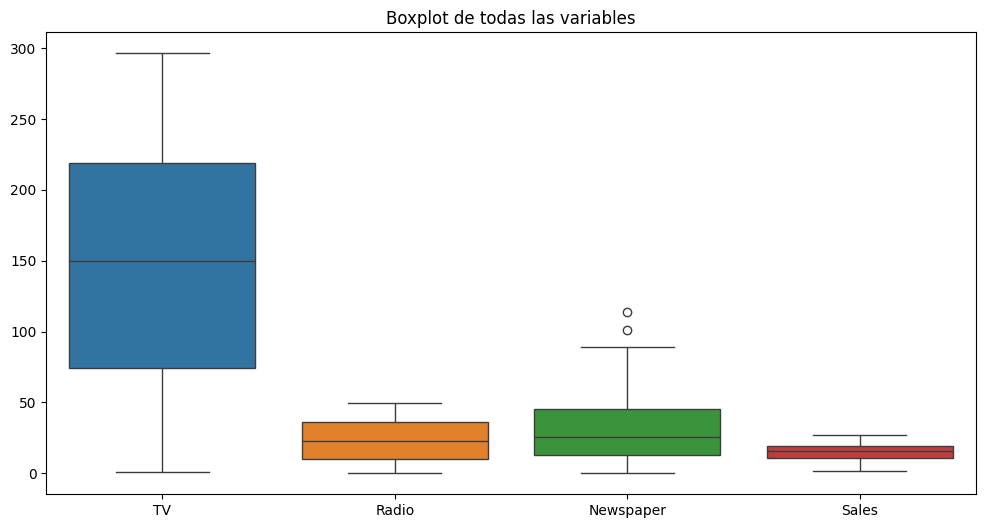

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot de todas las variables')
plt.show()

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


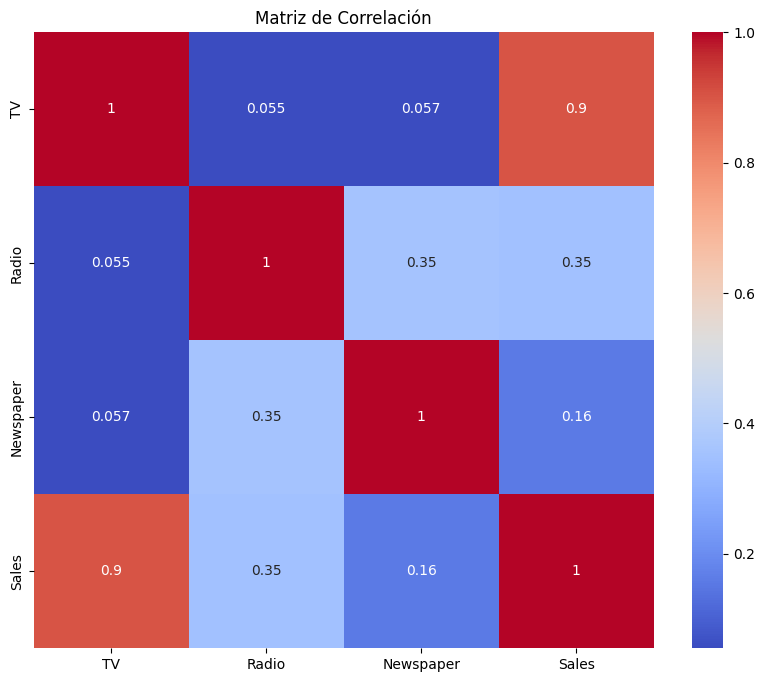

In [7]:

corr_matrix = df.corr()
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [8]:

X = df[['TV']]  
y = df['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()


model.fit(X_train, y_train)

LinearRegression()

In [11]:

y_train_pred = model.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'MSE Train: {mse_train}')
print(f'R² Train: {r2_train}')

MSE Train: 4.998442356450173
R² Train: 0.8134866044709264


In [12]:
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE Test: {mse_test}')
print(f'R² Test: {r2_test}')

MSE Test: 6.101072906773963
R² Test: 0.802561303423698


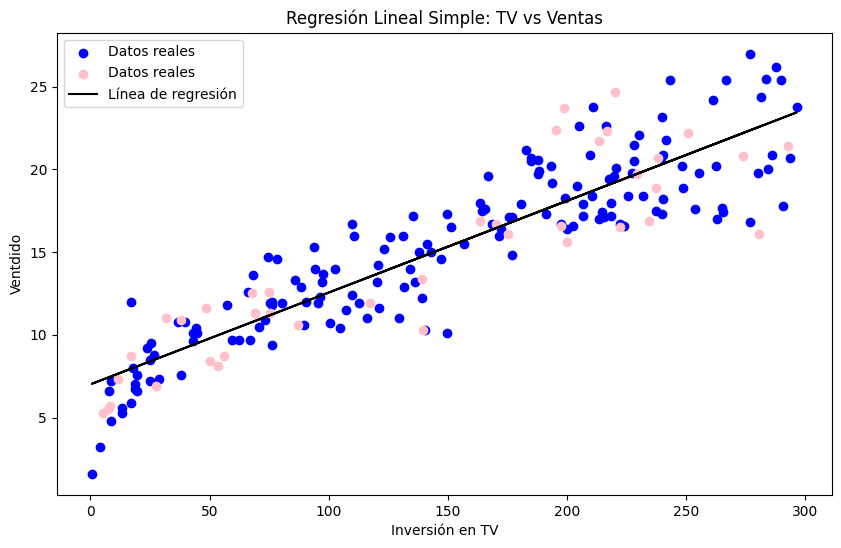

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Datos reales')
plt.scatter(X_test, y_test, color='pink', label='Datos reales')
plt.plot(X_train, y_train_pred, color='black', label='Línea de regresión')
plt.title('Regresión Lineal Simple: TV vs Ventas')
plt.xlabel('Inversión en TV')
plt.ylabel('Ventdido')
plt.legend()
plt.show()